import libraries and prepare data

In [78]:
# %pip install scikit-learn --upgrade

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer



In [9]:
pd.set_option("display.max_rows", 1000)
pd.set_option("display.max_colwidth", 100)

In [6]:
data = pd.read_csv('data/housing-classification-iter6.csv')
data

,LotArea,LotFrontage,TotalBsmtSF,BedroomAbvGr,Fireplaces,PoolArea,GarageCars,WoodDeckSF,ScreenPorch,Expensive,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,8450,65.0,856,3,0,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,9600,80.0,1262,3,1,0,2,298,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,11250,68.0,920,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,9550,60.0,756,3,1,0,3,0,0,0,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,14260,84.0,1145,4,1,0,3,192,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,62.0,953,3,1,0,2,0,0,0,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1456,13175,85.0,1542,3,2,0,2,349,0,0,...,Attchd,Unf,TA,TA,Y,NaN,MnPrv,NaN,WD,Normal
1457,9042,66.0,1152,4,2,0,1,0,0,1,...,Attchd,RFn,TA,TA,Y,NaN,GdPrv,Shed,WD,Normal
1458,9717,68.0,1078,2,0,0,1,366,0,0,...,Attchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [30]:
# import validation datss from google drive

url = 'https://drive.google.com/file/d/15PfmTxmavQCT-f7iY9tgwWxm9t4GRees/view'
# create path to file

path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]

validation_data = df = pd.read_csv(path)



In [41]:
validation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1459 non-null   int64  
 1   LotFrontage    1232 non-null   float64
 2   TotalBsmtSF    1458 non-null   float64
 3   BedroomAbvGr   1459 non-null   int64  
 4   Fireplaces     1459 non-null   int64  
 5   PoolArea       1459 non-null   int64  
 6   GarageCars     1458 non-null   float64
 7   WoodDeckSF     1459 non-null   int64  
 8   ScreenPorch    1459 non-null   int64  
 9   MSZoning       1455 non-null   object 
 10  Condition1     1459 non-null   object 
 11  Heating        1459 non-null   object 
 12  Street         1459 non-null   object 
 13  CentralAir     1459 non-null   object 
 14  Foundation     1459 non-null   object 
 15  ExterQual      1459 non-null   object 
 16  ExterCond      1459 non-null   object 
 17  BsmtQual       1415 non-null   object 
 18  BsmtCond

In [38]:
data['Expensive'].describe()

count    1460.000000
mean        0.148630
std         0.355845
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Expensive, dtype: float64

In [13]:
# count proprtion of values in the 'expensive column
data['Expensive'].value_counts(normalize=True)

0    0.85137
1    0.14863
Name: Expensive, dtype: float64

In [4]:
X = data
y = X.pop('Expensive')

0       0
1       0
2       0
3       0
4       0
       ..
1455    0
1456    0
1457    1
1458    0
1459    0
Name: Expensive, Length: 1460, dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotFrontage    1201 non-null   float64
 2   TotalBsmtSF    1460 non-null   int64  
 3   BedroomAbvGr   1460 non-null   int64  
 4   Fireplaces     1460 non-null   int64  
 5   PoolArea       1460 non-null   int64  
 6   GarageCars     1460 non-null   int64  
 7   WoodDeckSF     1460 non-null   int64  
 8   ScreenPorch    1460 non-null   int64  
 9   MSZoning       1460 non-null   object 
 10  Condition1     1460 non-null   object 
 11  Heating        1460 non-null   object 
 12  Street         1460 non-null   object 
 13  CentralAir     1460 non-null   object 
 14  Foundation     1460 non-null   object 
 15  ExterQual      1460 non-null   object 
 16  ExterCond      1460 non-null   object 
 17  BsmtQual       1423 non-null   object 
 18  BsmtCond

In [44]:
# print two lists of columns. One with Dtypes of object and one with Dtypes of int64 and float64
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']
len(categorical_columns)

43

In [45]:
numerical_columns = [col for col in X.columns if X[col].dtype in ['int64', 'float64']]
len(numerical_columns)

37

In [53]:
#missing values in cloumns with Dtypes of object
X[categorical_columns].isnull().sum()

MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
BsmtFinType2       38
HeatingQC           0
Electrical          1
Functional          0
GarageType         81
GarageFinish       81
GarageQual         81
GarageCond         81
PavedDrive          0
PoolQC           1453
Fence            1179
MiscFeature      1406
SaleType            0
SaleCondition       0
dtype: int64

In [63]:
X['PoolQC'].value_counts()

Gd    3
Ex    2
Fa    2
Name: PoolQC, dtype: int64

In [46]:
data.isna().sum()

LotArea             0
LotFrontage       259
TotalBsmtSF         0
BedroomAbvGr        0
Fireplaces          0
PoolArea            0
GarageCars          0
WoodDeckSF          0
ScreenPorch         0
Expensive           0
MSZoning            0
Condition1          0
Heating             0
Street              0
CentralAir          0
Foundation          0
ExterQual           0
ExterCond           0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
KitchenQual         0
FireplaceQu       690
MSSubClass          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
MasVnrArea          8
BsmtFinSF1          0
BsmtFinSF2          0
BsmtUnfSF           0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
KitchenAbvGr        0
TotRmsAbvGrd        0
GarageYrBlt        81
GarageArea          0
OpenPorchS

In [51]:
data['PoolQC'].sample(10)

848     NaN
408     NaN
826     NaN
1416    NaN
580     NaN
280     NaN
1399    NaN
538     NaN
739     NaN
1165    NaN
Name: PoolQC, dtype: object

In [29]:
data.columns

Index(['LotArea', 'LotFrontage', 'TotalBsmtSF', 'BedroomAbvGr', 'Fireplaces',
       'PoolArea', 'GarageCars', 'WoodDeckSF', 'ScreenPorch', 'MSZoning',
       'Condition1', 'Heating', 'Street', 'CentralAir', 'Foundation',
       'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'KitchenQual', 'FireplaceQu', 'MSSubClass',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'KitchenAbvGr', 'TotRmsAbvGrd', 'GarageYrBlt', 'GarageArea',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'MiscVal', 'MoSold',
       'YrSold', 'Id', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition2', 'BldgType',
       'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'BsmtFinT

In [15]:
# data splittting
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [21]:
#building the pipeline

# X_cat = X_train.select_dtypes(include=['object']) # select categorical columns. X_train maybe correct version than X.select
# X_num = X_train.select_dtypes(exclude=['object']) # select numerical columns

X_cat = X.select_dtypes(exclude='number').copy()
X_num = X.select_dtypes(include='number').copy()

numeric_pipe = make_pipeline(SimpleImputer(strategy='mean'))

categoric_pipe = make_pipeline(SimpleImputer(strategy='constant', fill_value='N_A'), OneHotEncoder(handle_unknown='ignore'))

preprocessor = ColumnTransformer(
    transformers=[
        ('num_pipe', numeric_pipe, X_num.columns),
        ('cat_pipe', categoric_pipe, X_cat.columns),
    ]
    )



Modelling decision tree

In [26]:
from sklearn.model_selection import GridSearchCV

full_pipeline = make_pipeline(preprocessor, DecisionTreeClassifier(random_state=123))

param_grid = {
    'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
    'decisiontreeclassifier__max_depth': range(2, 14, 2),
    'decisiontreeclassifier__min_samples_leaf': range(3, 12, 2)
}

search = GridSearchCV(full_pipeline,
                      param_grid,
                      cv=5,
                      verbose=1)

search.fit(X_train, y_train)
scores = {'dtree': search.best_score_}
scores

Fitting 5 folds for each of 60 candidates, totalling 300 fits


{'dtree': 0.9280730714207108}

KNN model

In [86]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

knn_pipe = make_pipeline(preprocessor,
                         StandardScaler(with_mean=False, with_std=True),
                         KNeighborsClassifier()
                         )

from sklearn.model_selection import GridSearchCV
param_grid = {
    'columntransformer__num_pipe__simpleimputer__strategy': ['mean', 'median'],
    'kneighborsclassifier__n_neighbors': range(2, 50),
    'kneighborsclassifier__weights': ['uniform', 'distance']
}

knn_search = GridSearchCV(knn_pipe,
                          param_grid,
                          cv=5,
                        #   scoring='accuracy',
                          verbose=1)

knn_search.fit(X_train, y_train)

scores['knn'] = knn_search.best_score_

scores


Fitting 5 folds for each of 192 candidates, totalling 960 fits


{'dtree': 0.9280730714207108, 'knn': 0.9306445104728365}

Error analysis

In [28]:
# test accuracy
accuracy_score(search.predict(X_test), y_test)

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

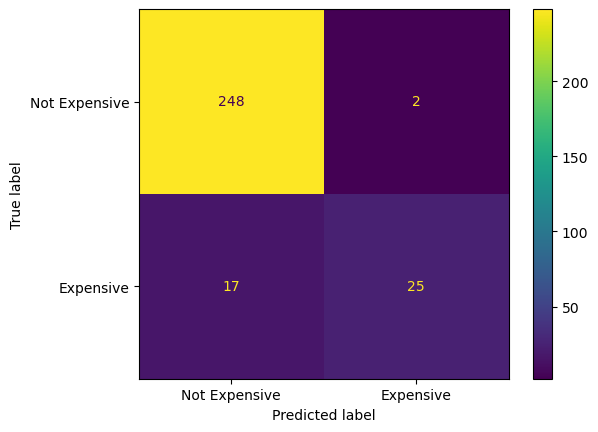

In [89]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(knn_search, # here to see model resutls indicate the name of the model search, knn_search etc
                                      X_test,
                                      y_test,
                                      display_labels=['Not Expensive', 'Expensive'])

Validation prediction

In [66]:
# test the decision tree model and predict on validation data
#this model is decision tree model
y_validation_pred = search.predict(validation_data) 


In [90]:

#this model is knn model
y_knn_validation_pred = knn_search.predict(validation_data) 

In [67]:
# create a dataframe with the validation data and the predictions
# validation_data['Expensive'] = y_validation_pred

submission_df = pd.DataFrame({'Id': validation_data['Id'], 'Expensive': y_validation_pred})

In [91]:
knn_df = pd.DataFrame({'Id': validation_data['Id'], 'Expensive': y_knn_validation_pred})

In [92]:
knn_df.to_csv('knn_csv', index=False)

In [93]:
knn_df

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,0
1457,2918,0


In [68]:
#df to csv
# submission_df.to_csv('submission.csv', index=False)

In [69]:
submission_df

,Id,Expensive
0,1461,0
1,1462,0
2,1463,0
3,1464,0
4,1465,0
...,...,...
1454,2915,0
1455,2916,0
1456,2917,1
1457,2918,0
